kaggle: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

IMPORT LIBRARIES

In [1]:
#basic
import numpy as np # linear algebra
import pandas as pd # data processing (pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and chaarts
import seaborn as sns #drawing statistical graphics
%matplotlib inline

#extra pandas
import ydata_profiling as pp

# extra visualization
#from autoviz.AutoViz_Class import AutoViz_Class


#model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler



Load data and basic analysis:

In [2]:
df= pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#Shape
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#statistical info of dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# ¿Data null?
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Dataset information
print('\033[1m'+'-> Dataset Info:'+'\033[0m') #'\033[1m' is for bold 
print('_' * 18)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
#print('\033[0m'+'*' * 20) # more ***** separation
print('\n')

# Dataset Detail
print('\033[1m'+'-> Dataset Details:'+'\033[0m')
print('_' * 35)
df.info(memory_usage = False)

-> Dataset Info:
__________________
Total Rows: 2290
Total Columns: 6


-> Dataset Details:
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)

**PANDAS PROFILING:** https://pypi.org/project/pandas-profiling/
https://medium.com/saturdays-ai/an%C3%A1lisis-exploratorio-de-datos-con-pandas-profiling-cf13e0e4a8f5

In [9]:
pp_df= pp.ProfileReport(df)

In [10]:
pp_df.to_file(output_file= 'pp_df.html') # With this line we export the pandas profiling report, 
                                         # it is downloaded as html in the local. 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Extra Visualizations

### AutoViz
https://www.youtube.com/watch?v=68T3timvdt8
https://bobrupakroy.medium.com/autoviz-and-lux-8de6fe4d9a25

In [11]:
'''
plt.figure(figsize = (10, 5))

AV = AutoViz_Class()
df_av = AV.AutoViz('gld_price_data.csv', sep=',', chart_format= 'server') #in chart_format, we can put HTML to download 
                    # the info in HTML or 'server' to open in the window
    # We can add in the funtion a maximum of columns to analyze whit: "max_cols_analyzed= _numer_" 
plt.show()
'''

'\nplt.figure(figsize = (10, 5))\n\nAV = AutoViz_Class()\ndf_av = AV.AutoViz(\'gld_price_data.csv\', sep=\',\', chart_format= \'server\') #in chart_format, we can put HTML to download \n                    # the info in HTML or \'server\' to open in the window\n    # We can add in the funtion a maximum of columns to analyze whit: "max_cols_analyzed= _numer_" \nplt.show()\n'

### LUX
https://bobrupakroy.medium.com/autoviz-and-lux-8de6fe4d9a25

https://www.youtube.com/watch?v=NedCgZQZcwM

https://github.com/lux-org/lux

https://github.com/lux-org/lux-datasets/tree/master/data

## Continue whit other visualitations

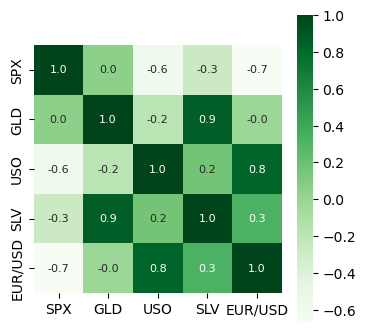

In [12]:
# Create a correlation matrix

plt.figure(figsize=(4,4))
corr= df.corr()
sns.heatmap(corr, fmt= '.1f', cbar= True, square= True, annot= True,annot_kws={'size':8}, cmap= 'Greens')
plt.show()

In [13]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

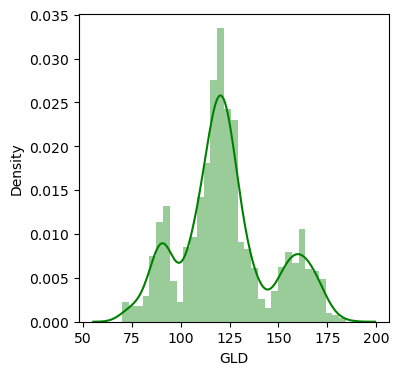

In [14]:
# checking the distribution of the GLD Price
plt.figure(figsize=(4,4))
sns.distplot(df['GLD'],color='green')

## Split Data

In [15]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [16]:
X = df.drop(['Date', 'GLD'], axis=1)
Y= df['GLD']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Model Training

In [18]:
model= RandomForestRegressor(n_estimators=100) # Define model and number of estimators
model.fit(X_train, Y_train) # Fit de model

RandomForestRegressor()

In [19]:
test_data_predict = model.predict(X_test)

In [20]:
print(test_data_predict)

[168.51029884  82.14279999 115.90360003 127.74780087 120.74190167
 154.72979825 150.27489847 126.12150077 117.47479867 126.06700046
 116.46290125 171.71000074 141.36809867 167.88749888 115.07839994
 117.52060034 137.74460343 169.78820119 159.66310339 156.13829899
 155.15630046 125.50900016 175.72519985 157.52040331 125.19040063
  93.85329985  77.98419975 120.63900016 119.02609923 167.15269975
  88.0820003  125.28030004  91.29160084 117.70290015 121.12939965
 137.10910073 115.40980121 115.38270076 148.78189987 107.16070075
 104.22330261  86.98489773 126.46580057 117.95550007 152.66559908
 119.47110057 108.29880017 107.92729809  93.10720061 127.15169787
  75.1329004  113.67619922 121.35300031 111.33179909 119.01889878
 120.72659964 159.84210042 169.07020095 147.01009703  85.88459863
  94.12890056  86.8394992   90.4585     119.06010073 126.41440046
 127.52930016 167.9111999  122.34809967 117.35339906  98.59090034
 168.68240086 143.16499932 132.05220212 121.11410226 120.37329947
 119.59000

In [21]:
error = r2_score(Y_test,test_data_predict)
print('R squared error:', error)

R squared error: 0.9890182940057543


In [22]:
Y_test= list(Y_test)

In [23]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
y_predict=model.predict(X_test)
model.score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9890182940057543

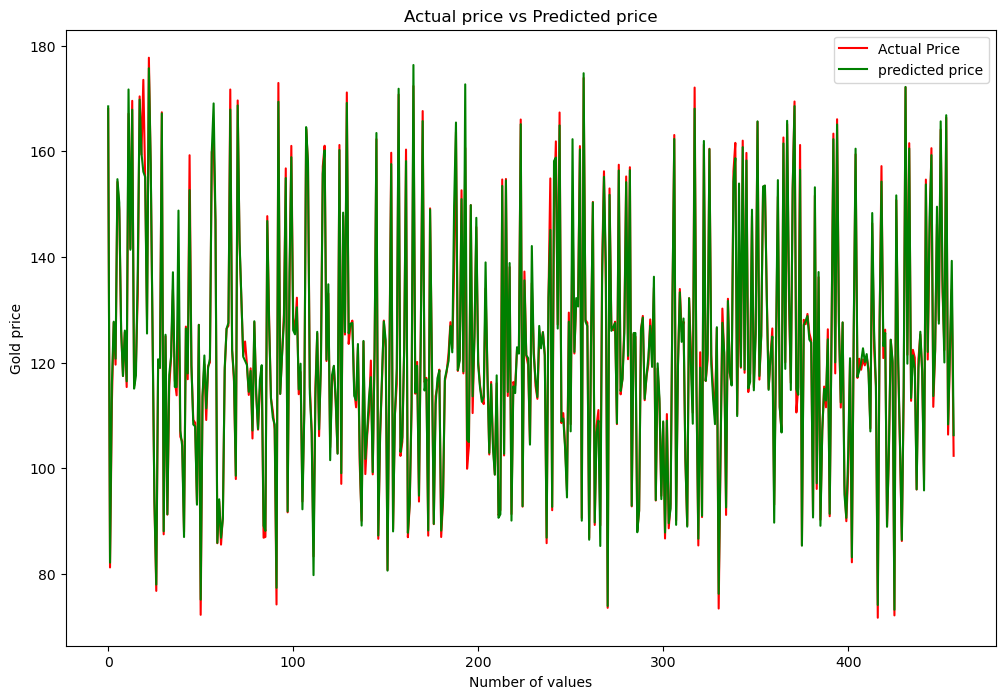

In [24]:
Y_test=list(Y_test)
plt.figure(figsize=(12,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(y_predict , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

## Active learning

In [25]:
features = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
target = df['GLD']

In [26]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(features, target, train_size=0.1, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_labeled, y_labeled)

RandomForestRegressor()

In [27]:
query_index = np.argmax(np.abs(y_unlabeled - model_2.predict(X_unlabeled)))
query_index

573

In [28]:
query_instance= X_unlabeled[query_index:query_index+1]
query_label=y_unlabeled[query_index:query_index+1]

In [29]:
X_labeled = np.vstack([X_labeled, query_instance])
y_labeled = np.hstack([y_labeled, query_label])

In [30]:
X_unlabeled = X_unlabeled.drop(index=query_index)
y_unlabeled = y_unlabeled.drop(index=688)

In [31]:
model_2.fit(X_labeled, y_labeled)

RandomForestRegressor()

In [32]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
y_predict=model_2.predict(X_test)
model_2.score(X_test,Y_test)

0.9687798756850451

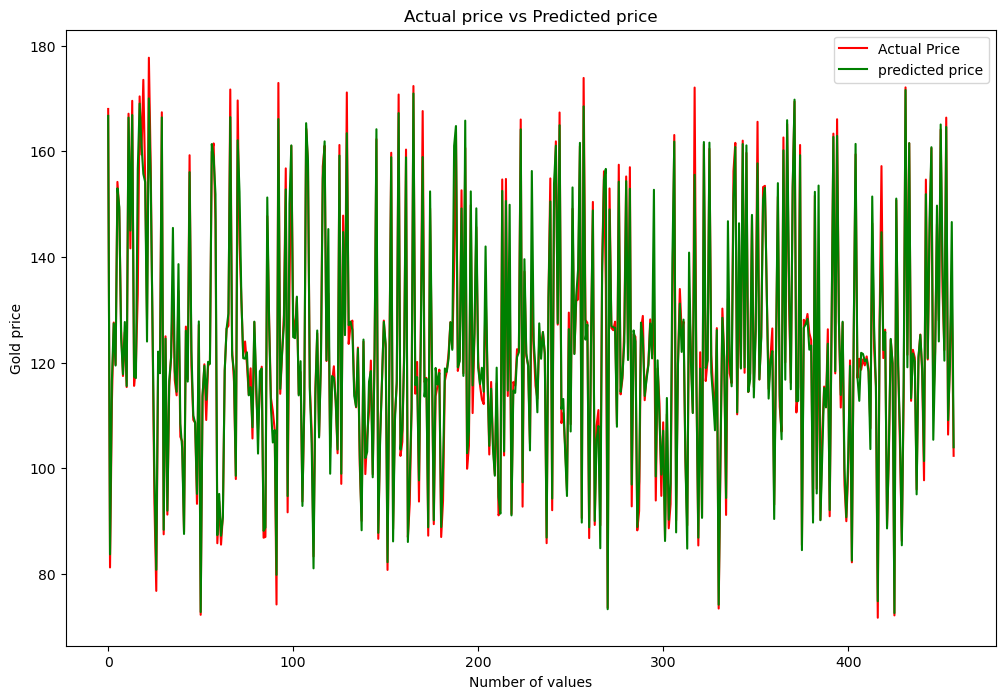

In [33]:
Y_test=list(Y_test)
plt.figure(figsize=(12,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(y_predict , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

In [34]:
test=np.array([[3733,11.37,25.51,1.2332],
              [3739,11.38,25.52,1.2323],
              [3758,11.46,25.66,1.2334],
              [3781,11.58,25.74,1.2349]])
t=model_2.predict(test)
print(t)

[147.78240081 147.78240081 149.73060134 149.76250136]


In [35]:
t={
    "SPX":[3810,3795],
    "USO":[11.59,11.57],
    "SLV":[25.87,25.79],
    "EUR/USD":[1.2381,1.2388]
}
t=pd.DataFrame(t)
t=model_2.predict(t)
print(t)

[150.17520155 149.76840132]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
